# I. Get and Prepare the Data

## 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn import metrics

In [2]:
warnings.filterwarnings('ignore')

## 2. Data Loading

In [3]:
data = pd.read_csv("..\\datasets\\startup_traction.csv", index_col = 0)
data.head()

,name,country,city,web,PIC,stage_order,stage_name,tweet_count,tweet_length,tweet_rate,...,reply_ratio,reply_rate,like_count,like_rate,like_ratio,quote_count,quote_rate,quote_ratio,engagement_ratio,stage_success
669,N.P.T. S.R.L.,ITALY,VALSAMOGGIA BO,NaN,917744355,1,INCEPTION,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1236,ADVANCED MATERIALS SRL,ITALY,LAIVES,http://www.airlite.eu,935677812,1,INCEPTION,636.0,170.550314,1.121693,...,0.031447,0.035273,547.0,0.964727,0.860063,547.0,0.964727,0.860063,71.408805,0
1643,GRAPHENEA SA,SPAIN,SAN SEBASTIAN GUIPUZCOA,http://www.graphenea.com,971995582,1,INCEPTION,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
331,CROIVALVE LIMITED,IRELAND,DUBLIN,http://www.croivalve.com,909573463,1,INCEPTION,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
614,OU COGNUSE,ESTONIA,TALLINN,http://www.cognuse.com,916757671,1,INCEPTION,126.0,137.015873,0.049901,...,0.031746,0.001584,96.0,0.038020,0.761905,96.0,0.038020,0.761905,5.880952,0


In [4]:
data.shape

(700, 29)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 669 to 684
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     700 non-null    object 
 1   country                  700 non-null    object 
 2   city                     700 non-null    object 
 3   web                      649 non-null    object 
 4   PIC                      700 non-null    int64  
 5   stage_order              700 non-null    int64  
 6   stage_name               700 non-null    object 
 7   tweet_count              309 non-null    float64
 8   tweet_length             309 non-null    float64
 9   tweet_rate               309 non-null    float64
 10  original_ratio           307 non-null    float64
 11  retweeted_ratio          289 non-null    float64
 12  replied_to_ratio         243 non-null    float64
 13  quoted_ratio             259 non-null    float64
 14  quoted_replied_to_ratio  18 n

In [6]:
data.describe()

,PIC,stage_order,tweet_count,tweet_length,tweet_rate,original_ratio,retweeted_ratio,replied_to_ratio,quoted_ratio,quoted_replied_to_ratio,...,reply_ratio,reply_rate,like_count,like_rate,like_ratio,quote_count,quote_rate,quote_ratio,engagement_ratio,stage_success
count,7.000000e+02,700.0,309.000000,309.000000,309.000000,307.000000,289.000000,243.000000,259.000000,18.000000,...,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,700.000000
mean,9.292259e+08,1.0,827.226537,164.880990,0.647391,0.628097,0.274610,0.080920,0.066066,0.002062,...,0.080327,0.057807,1566.990291,1.463221,2.041657,1566.990291,1.463221,2.041657,28.363142,0.158571
std,2.315713e+07,0.0,2492.959325,41.405425,1.729594,0.221603,0.196122,0.102985,0.066947,0.002453,...,0.108577,0.176579,6409.840015,6.883328,2.929950,6409.840015,6.883328,2.929950,146.586992,0.365537
min,8.940479e+08,1.0,1.000000,63.526006,0.000000,0.033333,0.008434,0.002169,0.000219,0.000031,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.191364,0.000000
25%,9.114126e+08,1.0,62.000000,129.030612,0.083160,0.465618,0.116935,0.020686,0.024349,0.000224,...,0.021622,0.002806,66.000000,0.094563,0.710247,66.000000,0.094563,0.710247,2.666667,0.000000
50%,9.245304e+08,1.0,224.000000,159.889117,0.232432,0.632258,0.234043,0.045918,0.048780,0.001433,...,0.048193,0.012644,265.000000,0.286169,1.492063,265.000000,0.286169,1.492063,4.738125,0.000000
75%,9.379953e+08,1.0,588.000000,194.246154,0.570370,0.808108,0.387261,0.105616,0.086488,0.002470,...,0.101974,0.033551,861.000000,0.925382,2.480000,861.000000,0.925382,2.480000,10.792899,0.000000
max,9.997544e+08,1.0,32317.000000,290.000000,24.631860,1.000000,1.000000,0.716749,0.666667,0.009709,...,1.044490,2.000000,84947.000000,97.000000,39.148528,84947.000000,97.000000,39.148528,2300.744681,1.000000


In [7]:
data.dtypes

name                        object
country                     object
city                        object
web                         object
PIC                          int64
stage_order                  int64
stage_name                  object
tweet_count                float64
tweet_length               float64
tweet_rate                 float64
original_ratio             float64
retweeted_ratio            float64
replied_to_ratio           float64
quoted_ratio               float64
quoted_replied_to_ratio    float64
retweet_count              float64
retweet_ratio              float64
retweet_rate               float64
reply_count                float64
reply_ratio                float64
reply_rate                 float64
like_count                 float64
like_rate                  float64
like_ratio                 float64
quote_count                float64
quote_rate                 float64
quote_ratio                float64
engagement_ratio           float64
stage_success       

## 3. Handling Missing Values

First we print the nulls:

In [8]:
data.isnull().sum()

name                         0
country                      0
city                         0
web                         51
PIC                          0
stage_order                  0
stage_name                   0
tweet_count                391
tweet_length               391
tweet_rate                 391
original_ratio             393
retweeted_ratio            411
replied_to_ratio           457
quoted_ratio               441
quoted_replied_to_ratio    682
retweet_count              391
retweet_ratio              391
retweet_rate               391
reply_count                391
reply_ratio                391
reply_rate                 391
like_count                 391
like_rate                  391
like_ratio                 391
quote_count                391
quote_rate                 391
quote_ratio                391
engagement_ratio           391
stage_success                0
dtype: int64

In [9]:
data['stage_name'].value_counts()

stage_name
INCEPTION    700
Name: count, dtype: int64

In [10]:
data['stage_order'].value_counts()

stage_order
1    700
Name: count, dtype: int64

**Decisions:**
- `quoted_replied_to_ratio`: This column can be dropped because 97% of its values are NaNs. The high percentage of missing values makes it uninformative and not useful for analysis.
- `web`, `PIC`: These columns are deemed irrelevant for the project's purpose. They do not contribute any meaningful information that would aid our analysis.
- `stage_name`, `stage_order`: Both columns have been found to contain only a single unique value throughout the dataset. This means they do not provide any variability or additional insight. Including them in the analysis would not contribute to differentiating between data points or understanding patterns.


Since stage_name is always "INCEPTION" and stage_order is always "1," they are redundant and do not help in distinguishing any stages or orders within our data.


By dropping these columns, we streamline our dataset to include only the features that are informative and relevant. 

In [11]:
data.drop(['quoted_replied_to_ratio', 'web', 'PIC', 'stage_order', 'stage_name'], axis=1, inplace=True)

The dataset after dropping the columns:

In [12]:
data.isna().sum()

name                  0
country               0
city                  0
tweet_count         391
tweet_length        391
tweet_rate          391
original_ratio      393
retweeted_ratio     411
replied_to_ratio    457
quoted_ratio        441
retweet_count       391
retweet_ratio       391
retweet_rate        391
reply_count         391
reply_ratio         391
reply_rate          391
like_count          391
like_rate           391
like_ratio          391
quote_count         391
quote_rate          391
quote_ratio         391
engagement_ratio    391
stage_success         0
dtype: int64

Upon examining the data within the Excel file, we observed that certain ratios could be calculated using the available information. Specifically, we completed four columns based on existing data. 

Firstly, we computed the `replied_to_ratio` by dividing the `reply_count` by the `tweet_count`, indicating the proportion of tweets that received replies. 

Secondly, we determined the `original_count` by subtracting the `retweet_count` from the `tweet_count`, representing the number of original tweets. 

Thirdly, we calculated the `original_ratio` by dividing the `original_count` by the `tweet_count`, denoting the proportion of tweets that are original. 

Lastly, we derived the `quoted_ratio` by dividing the `quote_count` by the `tweet_count`, signifying the proportion of tweets that are quoted. 

In [13]:
data['replied_to_ratio'] = data['reply_count'] / data['tweet_count']

data['original_count'] = data['tweet_count'] - data['retweet_count']

data['original_ratio'] = data['original_count'] / data['tweet_count']

data['quoted_ratio'] = data['quote_count'] / data['tweet_count']

In [14]:
data.isna().sum()

name                  0
country               0
city                  0
tweet_count         391
tweet_length        391
tweet_rate          391
original_ratio      391
retweeted_ratio     411
replied_to_ratio    391
quoted_ratio        391
retweet_count       391
retweet_ratio       391
retweet_rate        391
reply_count         391
reply_ratio         391
reply_rate          391
like_count          391
like_rate           391
like_ratio          391
quote_count         391
quote_rate          391
quote_ratio         391
engagement_ratio    391
stage_success         0
original_count      391
dtype: int64

After deliberation, we made the decision to handle the remaining missing values by replacing them with 0. 

This choice was based on the assumption that missing values indicate a lack of activity on Twitter. By filling these missing values with 0, we effectively treat them as if there were no corresponding activity for those specific metrics. 

This approach ensures that all data points are accounted for and prevents any bias that might arise from excluding records with missing values. 

After applying this method, we verified the completeness of our dataset by confirming that there were no remaining missing values, as indicated by the output of `data.isna().sum().sum()` returning 0.

In [15]:
data.fillna(0, inplace=True)

In [16]:
data.isna().sum().sum()

0

In [17]:
data.shape

(700, 25)

## 4. Data Exploration

### 4.1. Exploring Numerical Features

##### Distribution of Numeric Features

array([[<Axes: title={'center': 'tweet_count'}>,
        <Axes: title={'center': 'tweet_length'}>,
        <Axes: title={'center': 'tweet_rate'}>,
        <Axes: title={'center': 'original_ratio'}>,
        <Axes: title={'center': 'retweeted_ratio'}>],
       [<Axes: title={'center': 'replied_to_ratio'}>,
        <Axes: title={'center': 'quoted_ratio'}>,
        <Axes: title={'center': 'retweet_count'}>,
        <Axes: title={'center': 'retweet_ratio'}>,
        <Axes: title={'center': 'retweet_rate'}>],
       [<Axes: title={'center': 'reply_count'}>,
        <Axes: title={'center': 'reply_ratio'}>,
        <Axes: title={'center': 'reply_rate'}>,
        <Axes: title={'center': 'like_count'}>,
        <Axes: title={'center': 'like_rate'}>],
       [<Axes: title={'center': 'like_ratio'}>,
        <Axes: title={'center': 'quote_count'}>,
        <Axes: title={'center': 'quote_rate'}>,
        <Axes: title={'center': 'quote_ratio'}>,
        <Axes: title={'center': 'engagement_ratio'}>],

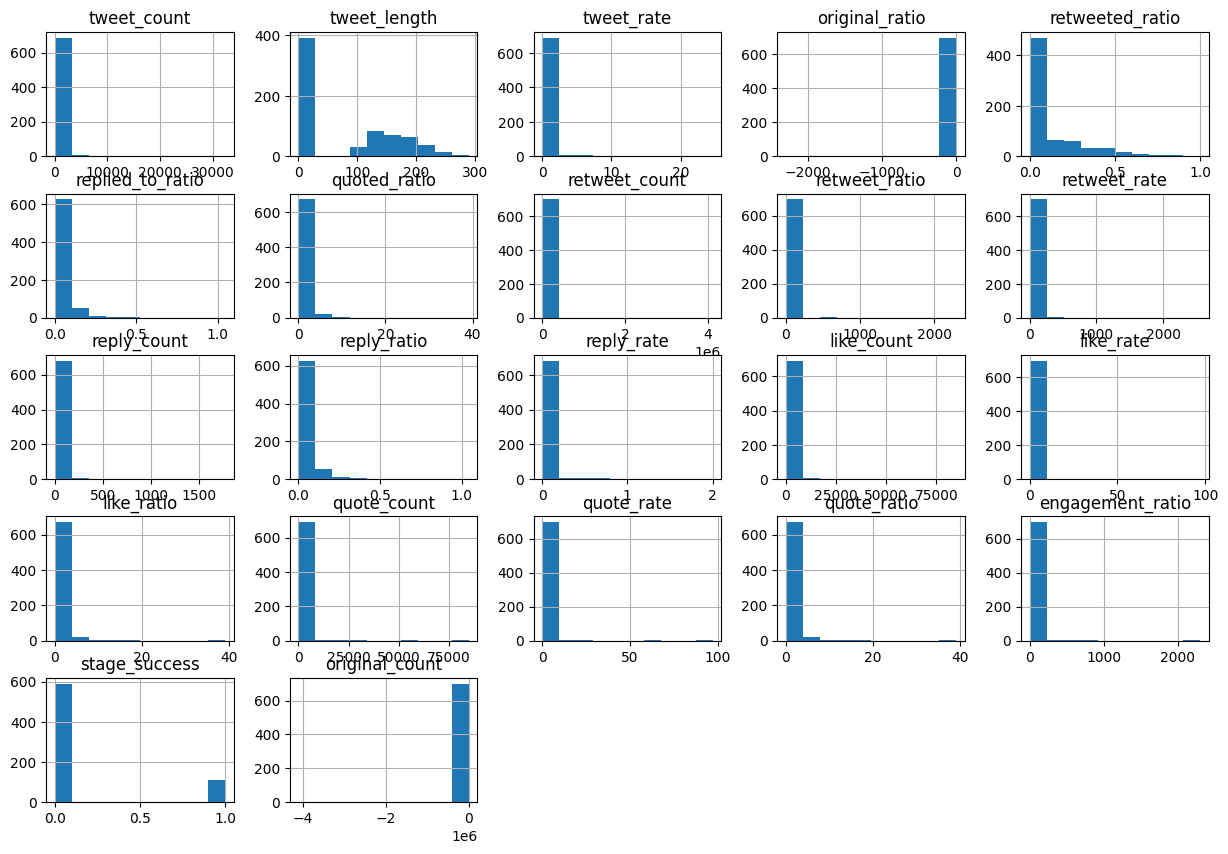

In [18]:
data.hist(figsize=(15, 10))

##### Correlation with the target

In [19]:
quantitative_columns = data.select_dtypes(include=['int', 'float']).columns
print(quantitative_columns)

Index(['tweet_count', 'tweet_length', 'tweet_rate', 'original_ratio',
       'retweeted_ratio', 'replied_to_ratio', 'quoted_ratio', 'retweet_count',
       'retweet_ratio', 'retweet_rate', 'reply_count', 'reply_ratio',
       'reply_rate', 'like_count', 'like_rate', 'like_ratio', 'quote_count',
       'quote_rate', 'quote_ratio', 'engagement_ratio', 'stage_success',
       'original_count'],
      dtype='object')


In [20]:
num_features = data[['tweet_count', 'tweet_length', 'tweet_rate', 'original_ratio',
       'retweeted_ratio', 'replied_to_ratio', 'quoted_ratio', 'retweet_count',
       'retweet_ratio', 'retweet_rate', 'reply_count', 'reply_ratio',
       'reply_rate', 'like_count', 'like_rate', 'like_ratio', 'quote_count',
       'quote_rate', 'quote_ratio', 'engagement_ratio', 'original_count']]

In [21]:
target = data['stage_success']

In [22]:
num_features.corrwith(target).sort_values(ascending = False)

retweeted_ratio     0.247027
tweet_length        0.196940
replied_to_ratio    0.149487
reply_ratio         0.149487
reply_rate          0.147066
tweet_rate          0.123814
engagement_ratio    0.108423
retweet_ratio       0.106329
quoted_ratio        0.094629
quote_ratio         0.094629
like_ratio          0.094629
like_rate           0.086180
quote_rate          0.086180
reply_count         0.044808
tweet_count         0.036605
retweet_rate        0.015833
original_count      0.009008
retweet_count      -0.008591
like_count         -0.010109
quote_count        -0.010109
original_ratio     -0.104922
dtype: float64

Upon analyzing the correlation coefficients between the numerical features and the target variable, we observed varying degrees of correlation. 

Notably, features such as `retweeted_ratio`, `tweet_length`, and `replied_to_ratio` demonstrated relatively strong positive correlations with the target variable. This suggests that posts with higher retweet ratios, longer lengths, and higher replied-to ratios tend to have higher levels of engagement, as indicated by the target variable. 

Additionally, features like `reply_ratio`, `reply_rate`, and `tweet_rate` displayed moderate positive correlations, indicating their influence on engagement levels as well. 

Conversely, certain features such as `original_ratio`, `retweet_count`, and `like_count` exhibited negative correlations with the target variable, suggesting a decrease in engagement associated with these factors. 

##### Correlation between the features

In [23]:
correlation_matrix = data[quantitative_columns].corr()

correlation_matrix

,tweet_count,tweet_length,tweet_rate,original_ratio,retweeted_ratio,replied_to_ratio,quoted_ratio,retweet_count,retweet_ratio,retweet_rate,...,reply_rate,like_count,like_rate,like_ratio,quote_count,quote_rate,quote_ratio,engagement_ratio,stage_success,original_count
tweet_count,1.000000,0.210491,0.931892,-0.034067,0.140220,0.120089,0.097085,0.201761,0.035266,0.196867,...,0.556084,0.793557,0.498848,0.097085,0.793557,0.498848,0.097085,0.037541,0.036605,-0.191298
tweet_length,0.210491,1.000000,0.238044,-0.104960,0.576217,0.470382,0.490478,0.058095,0.109694,0.070479,...,0.202299,0.174440,0.149690,0.490478,0.174440,0.149690,0.490478,0.121235,0.196940,-0.055927
tweet_rate,0.931892,0.238044,1.000000,-0.035996,0.152164,0.156835,0.148695,0.178034,0.037340,0.184143,...,0.679991,0.770472,0.648606,0.148695,0.770472,0.648606,0.148695,0.040880,0.123814,-0.168263
original_ratio,-0.034067,-0.104960,-0.035996,1.000000,-0.177737,-0.153244,-0.082252,-0.278742,-0.999987,-0.378309,...,-0.042560,-0.022186,-0.015969,-0.082252,-0.022186,-0.015969,-0.082252,-0.999652,-0.104922,0.278968
retweeted_ratio,0.140220,0.576217,0.152164,-0.177737,1.000000,0.337686,0.299288,0.117913,0.181118,0.142467,...,0.159591,0.134024,0.118806,0.299288,0.134024,0.118806,0.299288,0.187963,0.247027,-0.116638
replied_to_ratio,0.120089,0.470382,0.156835,-0.153244,0.337686,1.000000,0.769654,0.053536,0.155598,0.065990,...,0.467973,0.328699,0.298886,0.769654,0.328699,0.298886,0.769654,0.173895,0.149487,-0.052342
quoted_ratio,0.097085,0.490478,0.148695,-0.082252,0.299288,0.769654,1.000000,0.025199,0.084541,0.037389,...,0.430008,0.446268,0.467738,1.000000,0.446268,0.467738,1.000000,0.108103,0.094629,-0.024195
retweet_count,0.201761,0.058095,0.178034,-0.278742,0.117913,0.053536,0.025199,1.000000,0.278926,0.988301,...,0.174713,0.127772,0.071953,0.025199,0.127772,0.071953,0.025199,0.278883,-0.008591,-0.999943
retweet_ratio,0.035266,0.109694,0.037340,-0.999987,0.181118,0.155598,0.084541,0.278926,1.000000,0.378499,...,0.043738,0.023084,0.016754,0.084541,0.023084,0.016754,0.084541,0.999719,0.106329,-0.279139
retweet_rate,0.196867,0.070479,0.184143,-0.378309,0.142467,0.065990,0.037389,0.988301,0.378499,1.000000,...,0.186589,0.124234,0.088661,0.037389,0.124234,0.088661,0.037389,0.378520,0.015833,-0.988272


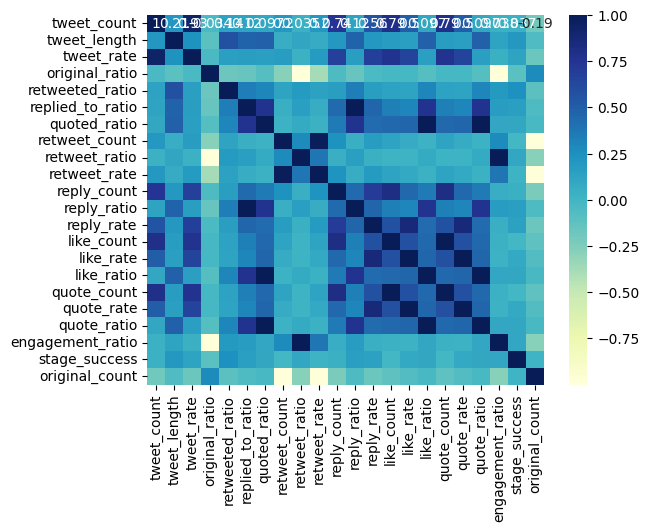

In [24]:
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot = True)
plt.show()

The correlation matrix reveals key relationships between Twitter engagement metrics. 

Notably, metrics like `tweet_count` are positively correlated with engagement indicators such as `reply_count`, `like_count`, and `quote_count`, indicating higher tweet volume leads to increased engagement. 

Conversely, `original_ratio` shows negative correlations with engagement metrics, implying that a higher proportion of original tweets relative to total tweets may reduce engagement. 

Metrics like `retweeted_ratio` and `replied_to_ratio` correlate positively with `like_count` and `quote_count`, suggesting that posts with higher retweet and reply ratios tend to attract more likes and quotes. 

In [25]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            print(f"{correlation_matrix.columns[i]} and {correlation_matrix.columns[j]} are correlated with a coefficient of {correlation_matrix.iloc[i, j]}")


tweet_count and tweet_rate are correlated with a coefficient of 0.9318921681183158
tweet_count and reply_count are correlated with a coefficient of 0.7432613742286771
tweet_count and like_count are correlated with a coefficient of 0.7935567779375243
tweet_count and quote_count are correlated with a coefficient of 0.7935567779375243
tweet_rate and like_count are correlated with a coefficient of 0.7704715435779632
tweet_rate and quote_count are correlated with a coefficient of 0.7704715435779632
original_ratio and retweet_ratio are correlated with a coefficient of -0.9999873749578441
original_ratio and engagement_ratio are correlated with a coefficient of -0.9996515745604682
replied_to_ratio and quoted_ratio are correlated with a coefficient of 0.769653982881421
replied_to_ratio and reply_ratio are correlated with a coefficient of 0.9999999999999998
replied_to_ratio and like_ratio are correlated with a coefficient of 0.769653982881421
replied_to_ratio and quote_ratio are correlated with 

This part of the code systematically checks pairs of columns in the correlation matrix to identify strong correlations (we decided on a correlation coefficient greater than 0.7). This process is crucial for identifying multicollinearity, where two or more variables are highly correlated, which can affect the reliability of statistical models. 

For instance, the output reveals several strong correlations: 
- `tweet_count` is highly correlated with `tweet_rate`, `reply_count`, `like_count`, and `quote_count`, indicating that these metrics tend to move together.
- `original_ratio` is strongly negatively correlated with `retweet_ratio` and `engagement_ratio`, suggesting an inverse relationship between the proportion of original tweets and these engagement metrics.
- `replied_to_ratio` and `quoted_ratio` are highly correlated with `reply_ratio` and `quote_ratio`, respectively, indicating that these ratios are closely related in their behavior.

##### Data Visualisation

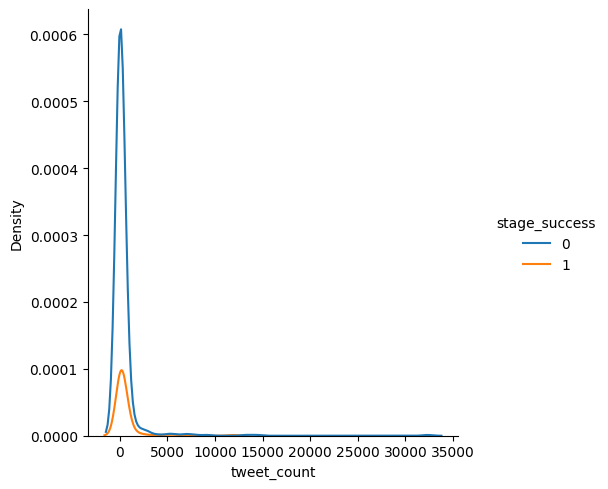

In [26]:
sns.displot(data, x = 'tweet_count', hue = 'stage_success', kind = 'kde')

The interpretation of the plot suggests that there's no clear number of tweet count that guarantees success. Instead, it shows that success is possible across a range of tweet counts. This implies that other factors beyond tweet count alone may influence the success of a stage or action. Therefore, while tweet count may be a factor, it's not the sole determinant of success.


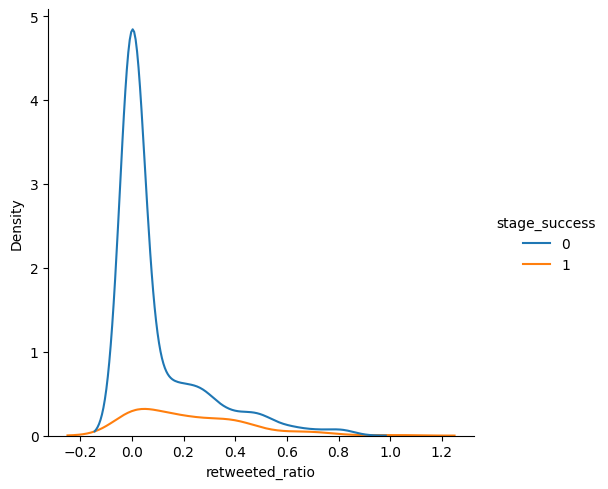

In [27]:
sns.displot(data, x = 'retweeted_ratio', hue = 'stage_success', kind = 'kde')

We can visually assess the distribution of retweeted ratios across different stages of success. If there's a noticeable difference in the distribution between successful and unsuccessful stages, it suggests that the retweeted ratio might be a relevant factor contributing to stage success.

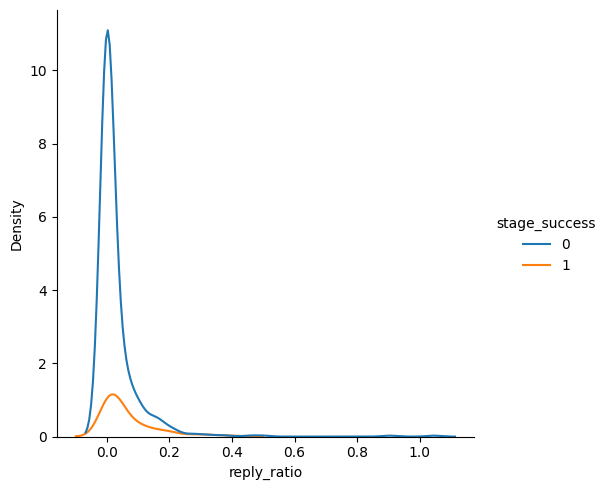

In [28]:
sns.displot(data, x = 'reply_ratio', hue = 'stage_success', kind = 'kde')

Here, we're essentially examining how the distribution of reply ratios differs between successful and unsuccessful stages. We can observe that there's a noticeable distinction in the distribution between the two categories, suggesting that the reply ratio could be a relevant factor in determining stage success.

<Axes: xlabel='retweeted_ratio', ylabel='Probability'>

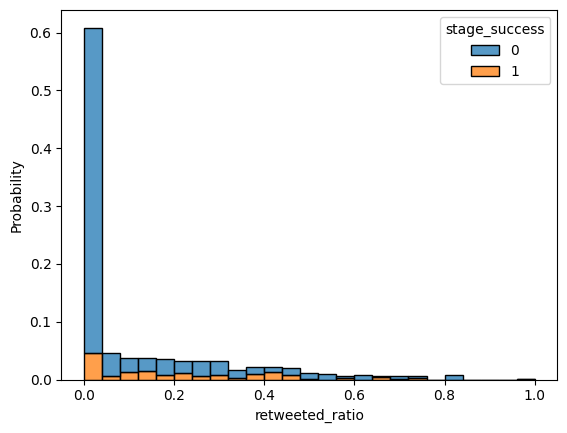

In [29]:
sns.histplot(data, x = 'retweeted_ratio', hue = target, multiple = 'stack', stat = 'probability')

By examining this histogram, we can understand how the distribution of retweeted ratios differs between funded and unfunded projects. The graph suggests that the retweeted ratio could be relevant to determining whether a project gets funded.

For instance, if we observe that the peak of the distribution for funded projects lies within the range of 0 to 0.5 on the x-axis (indicating a higher proportion of retweets), it implies that projects with a moderate level of retweets are more likely to get funded. Therefore, a higher probability within this range suggests that having a moderate retweeted ratio might increase the chances of project funding.

<Axes: xlabel='tweet_length', ylabel='Probability'>

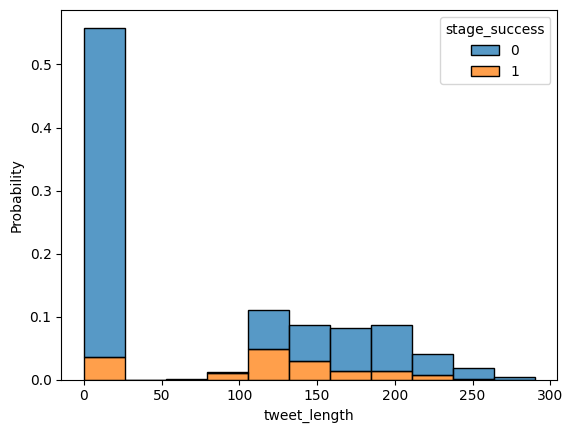

In [30]:
sns.histplot(data, x = 'tweet_length', hue = target, multiple = 'stack', stat = 'probability')

The plot suggests that tweets either very short (around 0 characters) or within the range of 100-150 characters are associated with higher probabilities of project funding.

A very short tweet length might indicate concise and impactful messaging, which can quickly capture attention, making it more likely for the project to receive funding. 

On the other hand, tweets between 100-150 characters strike a balance between conveying sufficient information and maintaining audience engagement. 

Tweets within this length range are often perceived as more digestible and easier to comprehend, aligning with the typical human attention span, which tends to wane for longer content. Therefore, tweets of optimal length are more likely to retain audience attention and increase the likelihood of project funding.

The following graph displays the same information:

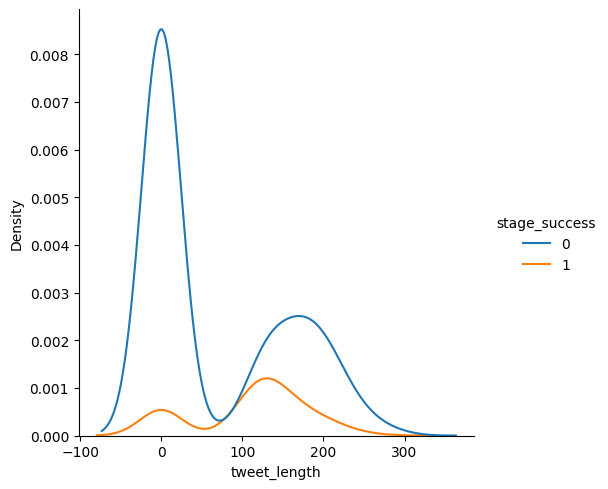

In [31]:
sns.displot(data, x = 'tweet_length', hue = 'stage_success', kind = 'kde')

#### 4.2. Exploring cathegorical features

In [32]:
data[['city']].value_counts()

city          
PARIS             20
LONDON            20
BARCELONA         16
MADRID            15
DUBLIN            12
                  ..
GUIPUZCOA          1
GUASTALLA          1
GROSUPLJE          1
GROSSRÖHRSDORF     1
ZÜRICH             1
Name: count, Length: 431, dtype: int64

In our exploration of categorical features, we first delved into the `city` data to understand its distribution. We discovered that we had 431 unique city entries, which, after encoding, would significantly increase the feature dimensionality, potentially causing issues with overfitting due to the large number of categories. Therefore, we decided to exclude 'city' from our analysis to maintain model simplicity and efficiency.

Moving on to the `country` feature, we observed that there were instances of 'UNDEFINED' and duplicate entries labeled as 'BARCELONA', which we addressed by removing the 'UNDEFINED' entries and consolidating the 'BARCELONA' instances into 'SPAIN'. After this preprocessing step, we examined the distribution of countries in our dataset and found notable differences in the number of projects from each country.

In [33]:
data = data[data['country'] != 'UNDEFINED']

data['country'] = data['country'].replace('BARCELONA', 'SPAIN')

In [34]:
cat_features = data[['country']]

cat_features.value_counts()

country       
SPAIN             99
FRANCE            62
UNITED KINGDOM    60
ITALY             56
GERMANY           50
DENMARK           42
ISRAEL            37
IRELAND           36
SWEDEN            35
NETHERLANDS       32
FINLAND           30
SWITZERLAND       26
NORWAY            26
AUSTRIA           16
HUNGARY           12
PORTUGAL          12
ESTONIA           12
ICELAND           10
BELGIUM            9
POLAND             9
SLOVENIA           9
GREECE             6
UKRAINE            3
SLOVAKIA           2
TURKEY             2
LC                 1
MALTA              1
PERUGIA            1
CYPRUS             1
LITHUANIA          1
Name: count, dtype: int64

To further analyze the impact of country on project success, we looked specifically at successful projects (where 'stage_success' equals 1) and calculated the success ratio for each country. This ratio represents the proportion of successful projects relative to the total number of projects for each country. We then sorted the countries based on their success ratio in descending order to identify which countries had the highest success rates.

In [35]:
founded = data['stage_success'] == 1

In [36]:
data[founded][['country']].value_counts()

country       
UNITED KINGDOM    17
FRANCE            13
ISRAEL            11
FINLAND           10
SPAIN             10
SWEDEN             8
IRELAND            6
NETHERLANDS        5
NORWAY             4
GERMANY            4
SWITZERLAND        4
ICELAND            3
ITALY              3
HUNGARY            2
DENMARK            2
ESTONIA            2
AUSTRIA            2
POLAND             1
PORTUGAL           1
SLOVENIA           1
GREECE             1
Name: count, dtype: int64

In [37]:
(data[founded][['country']].value_counts() / data[['country']].value_counts()).sort_values(ascending = False)

country       
FINLAND           0.333333
ICELAND           0.300000
ISRAEL            0.297297
UNITED KINGDOM    0.283333
SWEDEN            0.228571
FRANCE            0.209677
GREECE            0.166667
HUNGARY           0.166667
ESTONIA           0.166667
IRELAND           0.166667
NETHERLANDS       0.156250
NORWAY            0.153846
SWITZERLAND       0.153846
AUSTRIA           0.125000
POLAND            0.111111
SLOVENIA          0.111111
SPAIN             0.101010
PORTUGAL          0.083333
GERMANY           0.080000
ITALY             0.053571
DENMARK           0.047619
BELGIUM                NaN
CYPRUS                 NaN
LC                     NaN
LITHUANIA              NaN
MALTA                  NaN
PERUGIA                NaN
SLOVAKIA               NaN
TURKEY                 NaN
UKRAINE                NaN
Name: count, dtype: float64

#### Next, we plotted something we called `success_ratio` and we calculate it by taking the mean of the successes (1) compared to stage failures (0) for each country.

In [38]:
success_ratio = data.groupby('country')['stage_success'].mean()

#### We sorted the data by the success ratio.

In [39]:
success_ratio = success_ratio.sort_values(ascending=False)

#### And finally, we plotted it:

Finally, we visualized the success ratio by country using a bar plot. This plot provides a clear comparison of success ratios across different countries, allowing us to identify countries with higher success rates in project funding.

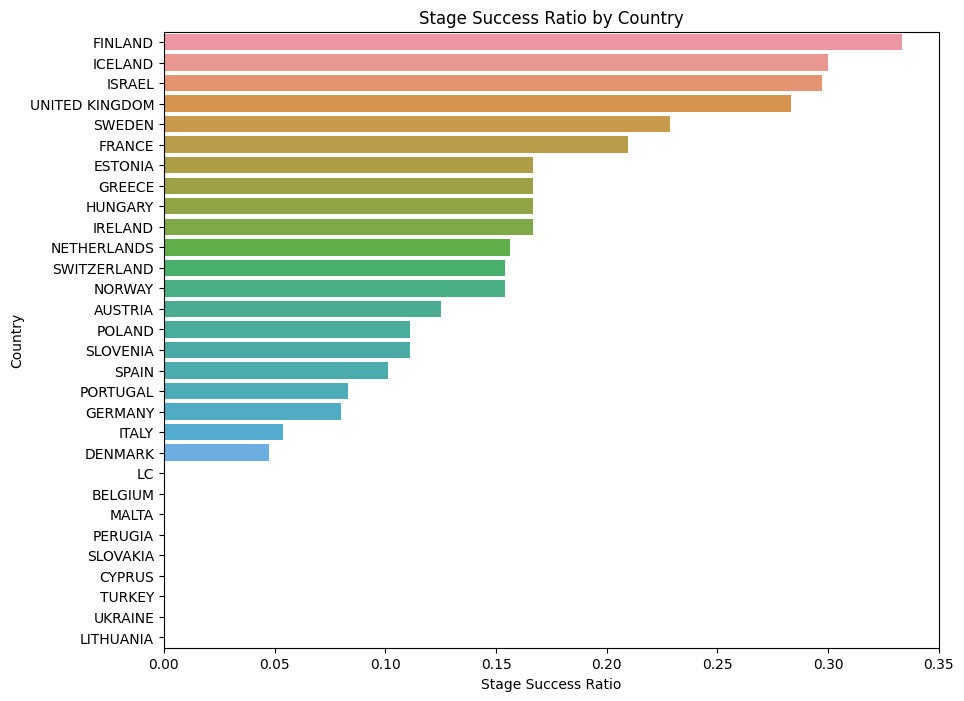

In [40]:
plt.figure(figsize=(10, 8))

sns.barplot(x=success_ratio.values, y=success_ratio.index)
plt.xlabel('Stage Success Ratio')
plt.ylabel('Country')
plt.title('Stage Success Ratio by Country')
plt.show()

# II. Build and Fit the Model

## 1. Defining the target and features

First, we list all the columns in our dataset to identify our target variable ('stage_success') and the features we'll use to predict it. We drop the 'name' and 'city' columns as they're not relevant for our prediction. Then, we separate our features (X) from our target (y). After checking the shape and data types of our features, we apply one-hot encoding to categorical variables in our features to convert them into a format suitable for machine learning models. This significantly increases the number of features in our dataset. Finally, we compute the correlation between each feature and our target variable to understand their relationship strength.

In [41]:
data.columns

Index(['name', 'country', 'city', 'tweet_count', 'tweet_length', 'tweet_rate',
       'original_ratio', 'retweeted_ratio', 'replied_to_ratio', 'quoted_ratio',
       'retweet_count', 'retweet_ratio', 'retweet_rate', 'reply_count',
       'reply_ratio', 'reply_rate', 'like_count', 'like_rate', 'like_ratio',
       'quote_count', 'quote_rate', 'quote_ratio', 'engagement_ratio',
       'stage_success', 'original_count'],
      dtype='object')

In [42]:
X = data.drop(['name', 'city', 'stage_success'], axis=1) 
y = data['stage_success'] 

In [43]:
X.shape, y.shape

((698, 22), (698,))

In [44]:
X.dtypes

country              object
tweet_count         float64
tweet_length        float64
tweet_rate          float64
original_ratio      float64
retweeted_ratio     float64
replied_to_ratio    float64
quoted_ratio        float64
retweet_count       float64
retweet_ratio       float64
retweet_rate        float64
reply_count         float64
reply_ratio         float64
reply_rate          float64
like_count          float64
like_rate           float64
like_ratio          float64
quote_count         float64
quote_rate          float64
quote_ratio         float64
engagement_ratio    float64
original_count      float64
dtype: object

In [45]:
X = pd.get_dummies(X)

In [46]:
X.shape

(698, 51)

In [47]:
X.corrwith(y).abs().sort_values(ascending = False)

retweeted_ratio           0.250047
tweet_length              0.202097
replied_to_ratio          0.151908
reply_ratio               0.151908
reply_rate                0.148285
tweet_rate                0.125033
engagement_ratio          0.109222
retweet_ratio             0.107075
country_UNITED KINGDOM    0.105830
original_ratio            0.105644
country_FINLAND           0.102215
quote_ratio               0.096899
like_ratio                0.096899
quoted_ratio              0.096899
country_ISRAEL            0.090715
quote_rate                0.086950
like_rate                 0.086950
country_ITALY             0.084318
country_DENMARK           0.076372
country_SPAIN             0.063134
country_GERMANY           0.059155
country_BELGIUM           0.049433
country_ICELAND           0.047120
reply_count               0.045618
country_SWEDEN            0.044758
country_FRANCE            0.044632
tweet_count               0.037403
country_UKRAINE           0.028417
country_PORTUGAL    

### 2. Data Splitting

Next, we split our data into training and testing sets using the train_test_split function from scikit-learn. We set aside 30% of the data for testing while maintaining the same class distribution (stratify=y) as in the original dataset to ensure representative samples in both sets. We then verify the proportions of success and failure classes in both the training and testing sets to ensure they match those in the original dataset, indicating a successful split.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, random_state=42, stratify = y)

##### Checking we have the same proportions as we have an unbalanced dataset.

In [49]:
proportion = data['stage_success'].value_counts(normalize=True)

proportion

stage_success
0    0.842407
1    0.157593
Name: proportion, dtype: float64

In [50]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

In [51]:
train_proportion = train_data['stage_success'].value_counts(normalize=True)
test_proportion = test_data['stage_success'].value_counts(normalize=True)

In [52]:
print("Proportions in training set:")
print(train_proportion)

print("\nProportions in test set:")
print(test_proportion)

Proportions in training set:
stage_success
0    0.842213
1    0.157787
Name: proportion, dtype: float64

Proportions in test set:
stage_success
0    0.842857
1    0.157143
Name: proportion, dtype: float64


In [53]:
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X_train)

X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index)

X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index)

## 3. Models

### First model: Regression Models

#### Model Selection - LogicticRegression

In [54]:
lr_model=LogisticRegression()

In [55]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [56]:
y_pred_lr = lr_model.predict(X_test)

In [57]:
confusion_matrix_lr = metrics.confusion_matrix(y_test, y_pred_lr)

print("Confusion Matrix (Logistic Regression):")
confusion_matrix_lr

Confusion Matrix (Logistic Regression):


array([[171,   6],
       [ 29,   4]], dtype=int64)

In [58]:
metrics.precision_score(y_test, y_pred_lr)

0.4

In [59]:
metrics.recall_score(y_test, y_pred_lr)

0.12121212121212122

**Evaluation:** The precision (the number of true positives divided by the total number of predicted positives) and recall (the number of true positives divided by the total number of actual positives) scores are quite low, indicating poor performance. The confusion matrix shows significant misclassifications.

**Decision:** We reject this model due to its low precision and recall scores, indicating poor predictive performance.


#### Model Selection - Linear Regression

In [60]:
threshold = 0.5

In [61]:
param_grid_linear = {
    'fit_intercept': [True, False]
}

In [62]:
linear_model = GridSearchCV(LinearRegression(), param_grid_linear, cv=5, return_train_score=True)

In [63]:
linear_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             return_train_score=True)

In [64]:
linear_res = pd.DataFrame(linear_model.cv_results_)

In [65]:
linear_results = linear_res[['mean_test_score', 'std_test_score', 'rank_test_score']]

print("Linear Regression Results:")
print(linear_results)

Linear Regression Results:
   mean_test_score  std_test_score  rank_test_score
0    -2.342211e+25    2.876998e+25                2
1    -6.390021e+24    1.278004e+25                1


In [66]:
y_pred_linear = linear_model.predict(X_test)

precision_linear = precision_score(y_test, (y_pred_linear >= threshold).astype(int))

recall_linear = recall_score(y_test, (y_pred_linear >= threshold).astype(int))

confusion_matrix_linear = metrics.confusion_matrix(y_test, (y_pred_linear >= threshold).astype(int))

In [67]:
print("Linear Regression:")
print(f"Precision: {precision_linear}")

print(f"Recall: {recall_linear}")

print("Confusion Matrix:")
print(confusion_matrix_linear)

Linear Regression:
Precision: 0.75
Recall: 0.18181818181818182
Confusion Matrix:
[[175   2]
 [ 27   6]]


**Evaluation:** The precision and recall scores are slightly better than logistic regression and quite good. The confusion matrix indicates misclassifications.

**Decision:** This model is one option.

#### Model Selection - Ridge Regression

In [68]:
param_grid_ridge = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

In [69]:
ridge_model = GridSearchCV(Ridge(), param_grid_ridge, cv=5, return_train_score=True)

In [70]:
ridge_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [71]:
ridge_res = pd.DataFrame(ridge_model.cv_results_)

In [72]:
ridge_results = ridge_res[['param_alpha', 'mean_test_score', 'std_test_score', 'rank_test_score']]

In [73]:
print("\nRidge Regression Results:")
print(ridge_results)


Ridge Regression Results:
  param_alpha  mean_test_score  std_test_score  rank_test_score
0       0.001        -0.013643        0.096574                3
1        0.01        -0.138846        0.281740                5
2         0.1        -0.160937        0.307622                6
3           1        -0.054305        0.130765                4
4          10         0.075159        0.083360                2
5         100         0.083396        0.064918                1


In [74]:
y_pred_ridge = ridge_model.predict(X_test)

precision_ridge = precision_score(y_test, (y_pred_ridge >= threshold).astype(int))

recall_ridge = recall_score(y_test, (y_pred_ridge >= threshold).astype(int))

confusion_matrix_ridge = metrics.confusion_matrix(y_test, (y_pred_ridge >= threshold).astype(int))

In [75]:
print("\nRidge Regression:")

print(f"Precision: {precision_ridge}")

print(f"Recall: {recall_ridge}")

print("Confusion Matrix:")
print(confusion_matrix_ridge)


Ridge Regression:
Precision: 0.4
Recall: 0.06060606060606061
Confusion Matrix:
[[174   3]
 [ 31   2]]


**Evaluation:** The precision and recall scores are still low, and the confusion matrix shows misclassifications.

**Decision:** We reject this model due to its low precision and recall scores, indicating poor predictive performance.

#### Model Selection - Lasso Regression

In [76]:
param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

In [77]:
lasso_model = GridSearchCV(Lasso(), param_grid_lasso, cv=5, return_train_score=True)

In [78]:
lasso_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [79]:
lasso_res = pd.DataFrame(lasso_model.cv_results_)

In [80]:
lasso_results = lasso_res[['param_alpha', 'mean_test_score', 'std_test_score', 'rank_test_score']]

In [81]:
print("\nLasso Regression Results:")
print(lasso_results)


Lasso Regression Results:
  param_alpha  mean_test_score  std_test_score  rank_test_score
0       0.001         0.049052        0.069190                2
1        0.01         0.095210        0.053670                1
2         0.1        -0.016678        0.022359                3
3           1        -0.018769        0.020883                4
4          10        -0.018769        0.020883                4
5         100        -0.018769        0.020883                4


In [82]:
y_pred_lasso = lasso_model.predict(X_test)

precision_lasso = precision_score(y_test, (y_pred_lasso >= threshold).astype(int))

recall_lasso = recall_score(y_test, (y_pred_lasso >= threshold).astype(int))

confusion_matrix_lasso = metrics.confusion_matrix(y_test, (y_pred_lasso >= threshold).astype(int))

In [83]:
print("\nLasso Regression:")

print(f"Precision: {precision_lasso}")

print(f"Recall: {recall_lasso}")

print("Confusion Matrix:")
print(confusion_matrix_lasso)


Lasso Regression:
Precision: 0.3333333333333333
Recall: 0.030303030303030304
Confusion Matrix:
[[175   2]
 [ 32   1]]


**Evaluation:** The precision and recall scores are slightly better than ridge regression, but still low. The confusion matrix indicates misclassifications.

**Decision:** We reject this model due to its low precision and recall scores, indicating poor predictive performance.

#### Model Selection - Polynomial Regression

In [84]:
param_grid_poly = {
    'polynomialfeatures__degree': [1, 2, 3]
}

In [85]:
polynomial_model = GridSearchCV(make_pipeline(PolynomialFeatures(), Ridge()), param_grid_poly, cv=5, return_train_score=True)

In [86]:
polynomial_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             param_grid={'polynomialfeatures__degree': [1, 2, 3]},
             return_train_score=True)

In [87]:
poly_res = pd.DataFrame(polynomial_model.cv_results_)

In [88]:
poly_results = poly_res[['param_polynomialfeatures__degree', 'mean_test_score', 'std_test_score', 'rank_test_score']]

In [89]:
print("\nPolynomial Regression Results:")
print(poly_results)


Polynomial Regression Results:
  param_polynomialfeatures__degree  mean_test_score  std_test_score  \
0                                1        -0.054305        0.130765   
1                                2      -167.322845      309.998178   
2                                3     -8608.266072    15289.462044   

   rank_test_score  
0                1  
1                2  
2                3  


In [90]:
y_pred_poly = polynomial_model.predict(X_test)

precision_poly = precision_score(y_test, (y_pred_poly >= threshold).astype(int))

recall_poly = recall_score(y_test, (y_pred_poly >= threshold).astype(int))

confusion_matrix_poly = metrics.confusion_matrix(y_test, (y_pred_poly >= threshold).astype(int))

In [91]:
print("\nPolynomial Regression:")

print(f"Precision: {precision_poly}")

print(f"Recall: {recall_poly}")

print("Confusion Matrix:")
print(confusion_matrix_poly)


Polynomial Regression:
Precision: 0.5
Recall: 0.15151515151515152
Confusion Matrix:
[[172   5]
 [ 28   5]]


**Evaluation:** The precision and recall scores are slightly better than linear regression, but still low. The confusion matrix indicates misclassifications.

**Decision:** We reject this model due to its low precision and recall scores, indicating poor predictive performance.

### Second Model: DecisionTreeClassifier

#### a. Model Selection

Firstly, we have checked the preformance without any hyperparameters:

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [94]:
y_pred_dt = dt_model.predict(X_test)

In [95]:
confusion_matrix_dt = metrics.confusion_matrix(y_test, y_pred_dt)

print("Confusion Matrix (Decision Tree):")
print(confusion_matrix_dt)

Confusion Matrix (Decision Tree):
[[160  17]
 [ 19  14]]


<Axes: >

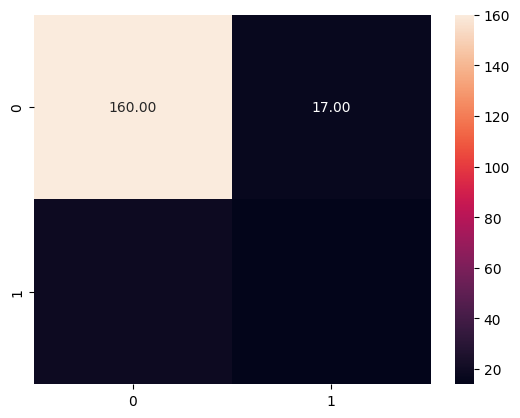

In [96]:
sns.heatmap(confusion_matrix_dt, annot = True, fmt = ".2f")

In [97]:
metrics.precision_score(y_test, y_pred_dt)

0.45161290322580644

In [98]:
metrics.recall_score(y_test, y_pred_dt)

0.42424242424242425

We first fit a DecisionTreeClassifier without any hyperparameters. This is to see its initial performance.

**Decision:** While the precision is relatively higher compared to previous models, the recall is still low. We proceed to hyperparameter tuning to see if we can improve performance.

#### b. Hyperparameters Tuning:

We define a grid of hyperparameters to search over using GridSearchCV.

The grid includes criteria such as the criterion used for splitting, maximum depth of the tree, minimum samples split, minimum samples leaf, maximum leaf nodes, and minimum impurity decrease.

In [99]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 5, 10, 20],
    'min_impurity_decrease': [0.0, 0.1, 0.2]
}

In [100]:
dt_model = DecisionTreeClassifier(random_state=0)

In [101]:
dt_grid = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='precision', return_train_score=True)
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_leaf_nodes': [None, 5, 10, 20],
                         'min_impurity_decrease': [0.0, 0.1, 0.2],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='precision')

In [102]:
best_params_dt = dt_grid.best_params_
best_score_dt = dt_grid.best_score_

print("Best Parameters for Decision Tree Classifier:")
print(best_params_dt)

print("Best Score:", best_score_dt)

Best Parameters for Decision Tree Classifier:
{'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: 0.5291666666666666


In [103]:
best_dt_model = dt_grid.best_estimator_

y_pred_dt_best = best_dt_model.predict(X_test)

In [104]:
confusion_matrix_dt_best = metrics.confusion_matrix(y_test, y_pred_dt_best)

precision_dt_best = metrics.precision_score(y_test, y_pred_dt_best)

recall_dt_best = metrics.recall_score(y_test, y_pred_dt_best)

In [105]:
print("Confusion Matrix (Best Decision Tree Model):")

print(confusion_matrix_dt_best)

print("Precision:", precision_dt_best)

print("Recall:", recall_dt_best)

Confusion Matrix (Best Decision Tree Model):
[[168   9]
 [ 23  10]]
Precision: 0.5263157894736842
Recall: 0.30303030303030304


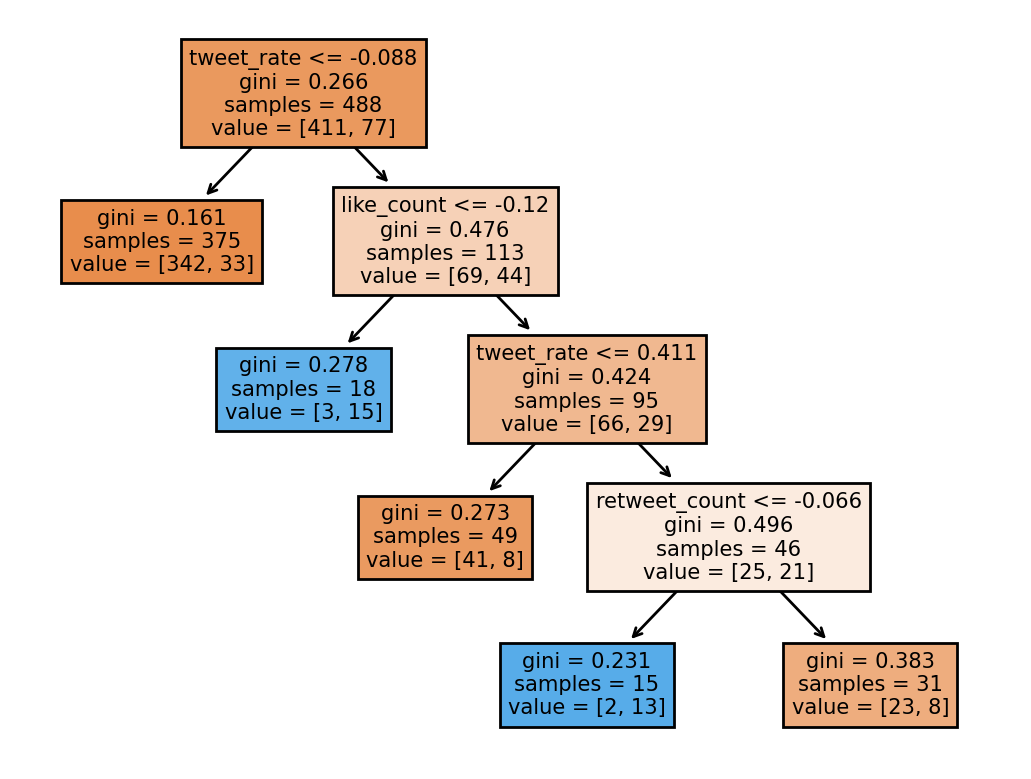

In [106]:
plt.figure(dpi=200)

plot_tree(best_dt_model, feature_names=list(X.columns), filled=True)
plt.show()

In [107]:
scores = pd.DataFrame(dt_grid.cv_results_)

Plot the results for max_depth

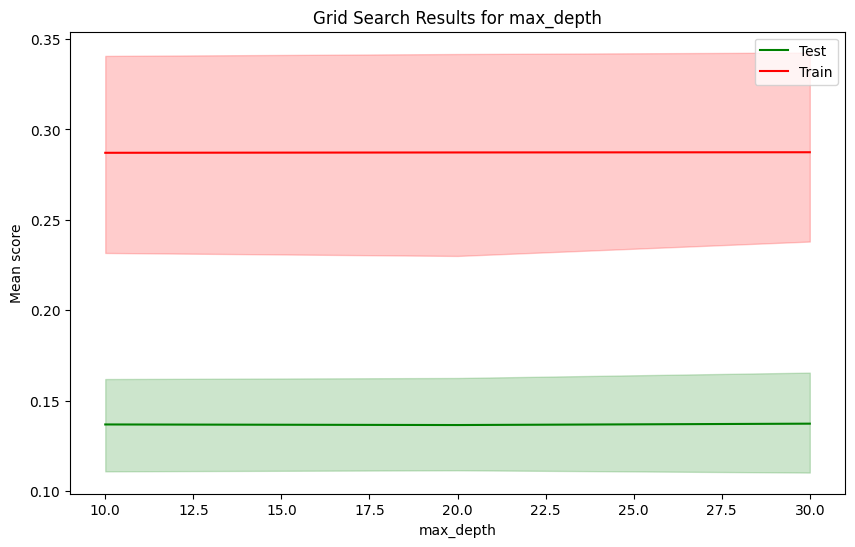

In [108]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=scores, x='param_max_depth', y='mean_test_score', color='green', label='Test')
ax = sns.lineplot(data=scores, x='param_max_depth', y='mean_train_score', color='red', label='Train')
ax.set_ylabel('Mean score')
ax.set_xlabel('max_depth')
plt.title('Grid Search Results for max_depth')
plt.show()

Plot the results for max_leaf_nodes

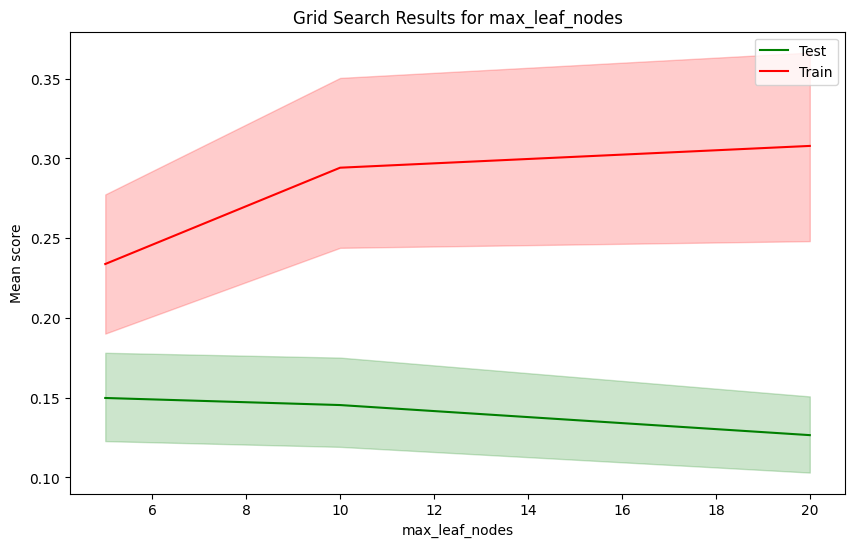

In [109]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=scores, x='param_max_leaf_nodes', y='mean_test_score', color='green', label='Test')
ax = sns.lineplot(data=scores, x='param_max_leaf_nodes', y='mean_train_score', color='red', label='Train')
ax.set_ylabel('Mean score')
ax.set_xlabel('max_leaf_nodes')
plt.title('Grid Search Results for max_leaf_nodes')
plt.show()

Plot the results for min_samples_split

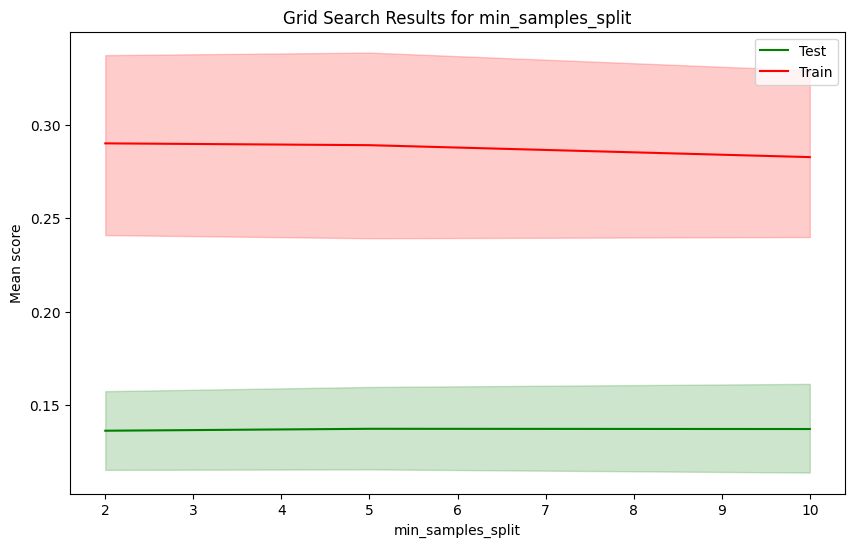

In [110]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=scores, x='param_min_samples_split', y='mean_test_score', color='green', label='Test')
ax = sns.lineplot(data=scores, x='param_min_samples_split', y='mean_train_score', color='red', label='Train')
ax.set_ylabel('Mean score')
ax.set_xlabel('min_samples_split')
plt.title('Grid Search Results for min_samples_split')
plt.show()

Plot the results for min_samples_leaf

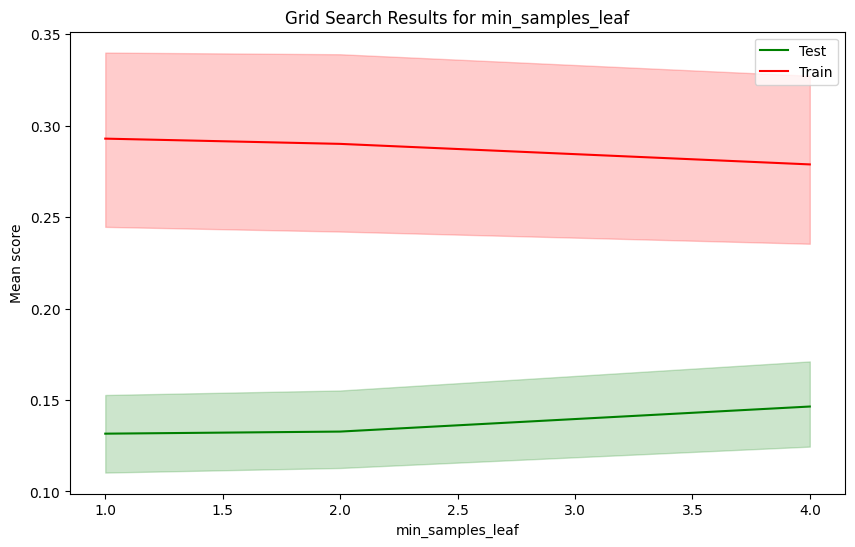

In [111]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=scores, x='param_min_samples_leaf', y='mean_test_score', color='green', label='Test')
ax = sns.lineplot(data=scores, x='param_min_samples_leaf', y='mean_train_score', color='red', label='Train')
ax.set_ylabel('Mean score')
ax.set_xlabel('min_samples_leaf')
plt.title('Grid Search Results for min_samples_leaf')
plt.show()

Plot the results for min_impurity_decrease

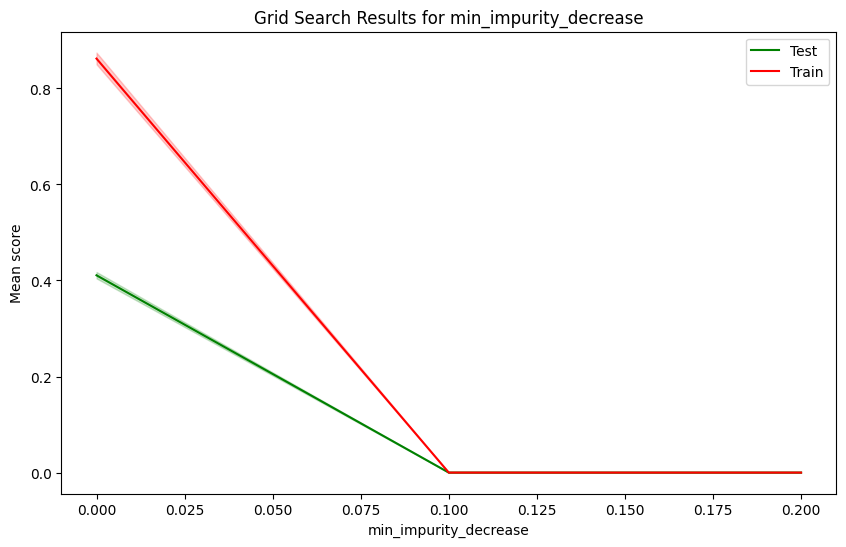

In [112]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=scores, x='param_min_impurity_decrease', y='mean_test_score', color='green', label='Test')
ax = sns.lineplot(data=scores, x='param_min_impurity_decrease', y='mean_train_score', color='red', label='Train')
ax.set_ylabel('Mean score')
ax.set_xlabel('min_impurity_decrease')
plt.title('Grid Search Results for min_impurity_decrease')
plt.show()

Plot the results for criterion

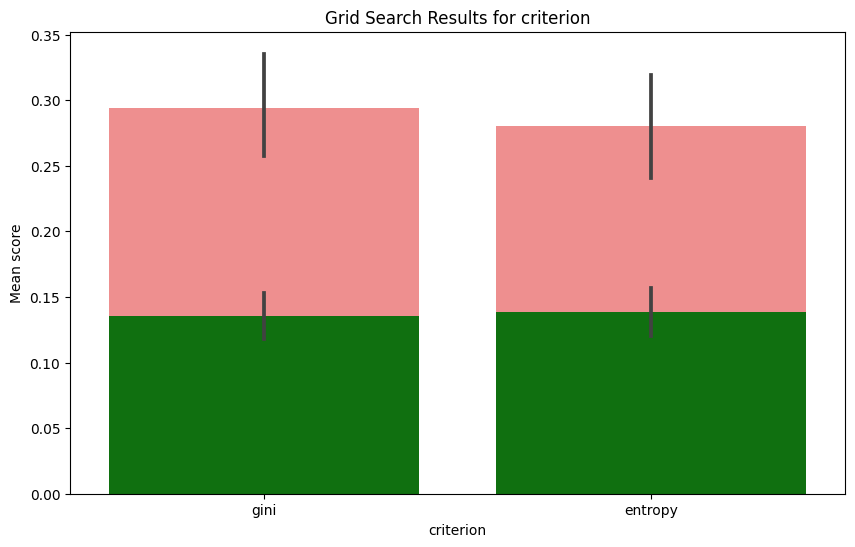

In [113]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=scores, x='param_criterion', y='mean_train_score', color='red', label='Train', alpha =0.5)
ax = sns.barplot(data=scores, x='param_criterion', y='mean_test_score', color='green', label='Test')
ax.set_ylabel('Mean score')
ax.set_xlabel('criterion')
plt.title('Grid Search Results for criterion')
plt.show()

**Decision:** Although the precision score improved slightly, the recall score is still relatively low, and we're not yet achieving our target of predicting at least 5 successful companies with high precision.

#### c. Feature Importance Analysis:

We analyze the feature importances of the best model to understand which features are contributing the most to the predictions.

The feature importances are sorted and visualized in a bar plot.

We observe that only a few features have significant importance in the model, which may indicate the need for feature selection to improve model performance.

In [114]:
dt_grid.best_estimator_.feature_importances_

array([0.        , 0.        , 0.55487138, 0.        , 0.        ,
       0.        , 0.        , 0.20927151, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.23585711, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [115]:
feature_importances = pd.DataFrame({'Feature': X.columns, 
                                    'Importance': dt_grid.best_estimator_.feature_importances_})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

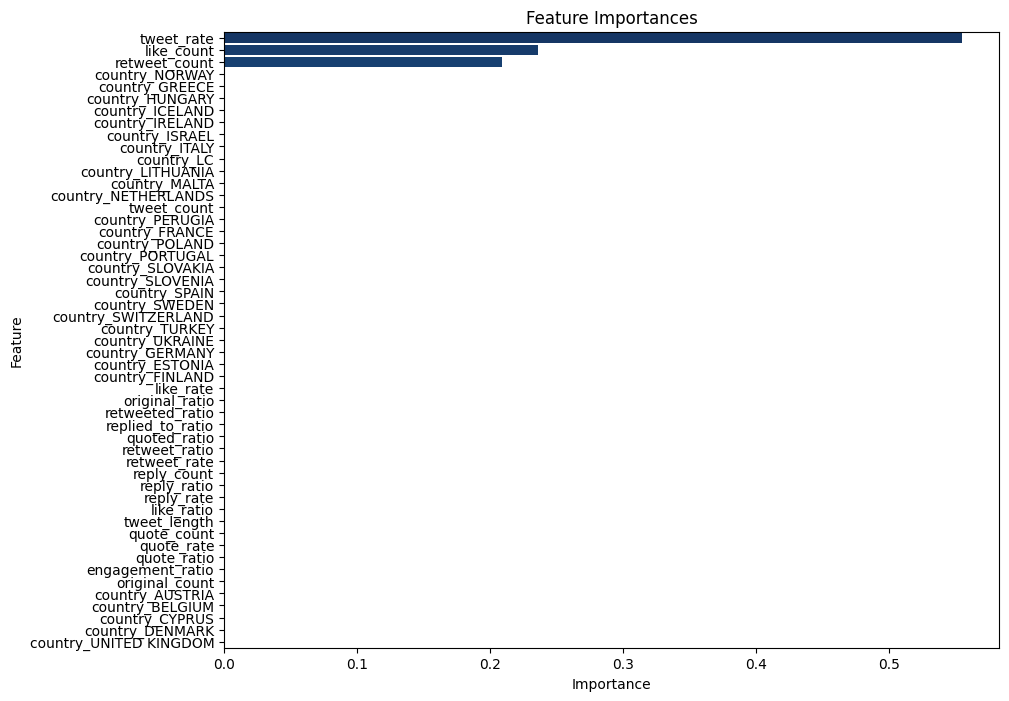

In [116]:
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='Blues_r')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Third Model: RandomForestClassifier

We start by defining a parameter grid for the RandomForestClassifier. This grid includes various hyperparameters such as max depth, max features, min samples leaf, min samples split, and the number of estimators (trees) in the forest.
We then use GridSearchCV to search over this parameter grid and find the best combination of hyperparameters that maximizes precision.

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [None, 10, 20, 30],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 300, 1000]
}

In [119]:
rf_model = RandomForestClassifier(random_state=0)

In [120]:
rf_grid = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [121]:
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [None, 10, 20, 30],
                         'max_features': [2, 3], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [122]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [123]:
y_pred_rf = rf_grid.predict(X_test)

In [124]:
confusion_matrix_rf = metrics.confusion_matrix(y_test, y_pred_rf)

print("Confusion Matrix (Random Forest):")
print(confusion_matrix_rf)

Confusion Matrix (Random Forest):
[[175   2]
 [ 29   4]]


<Axes: >

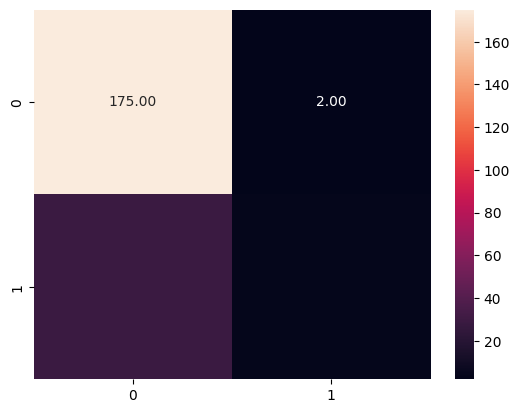

In [125]:
sns.heatmap(confusion_matrix_rf, annot = True, fmt = ".2f")

In [126]:
metrics.precision_score(y_test, y_pred_rf)

0.6666666666666666

In [127]:
metrics.recall_score(y_test, y_pred_dt)

0.42424242424242425

**Decision:** The RandomForestClassifier achieved a relatively high precision score of 0.67, which meets our criterion. However, the recall score is still relatively low, indicating that it might not be predicting enough successful companies. While the precision is acceptable, the model doesn't meet our target of predicting at least 5 successful companies with high precision.

### Forth Model: Support Vector Machines

In [128]:
from sklearn.svm import SVC

In [129]:
svm_model = SVC(random_state=0)
svm_model.fit(X_train, y_train)

SVC(random_state=0)

In [130]:
y_pred_svm = svm_model.predict(X_test)

In [131]:
confusion_matrix_svm = metrics.confusion_matrix(y_test, y_pred_svm)

print("Confusion Matrix (SVM):")
print(confusion_matrix_svm)

Confusion Matrix (SVM):
[[175   2]
 [ 33   0]]


<Axes: >

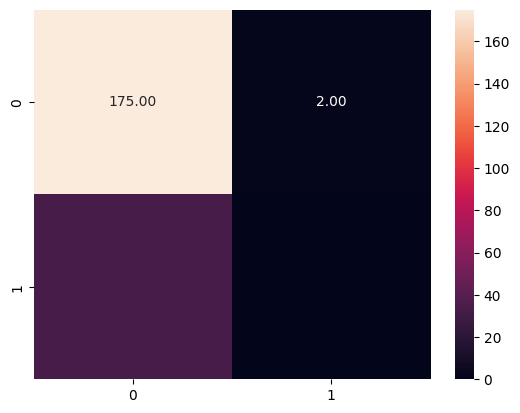

In [132]:
sns.heatmap(confusion_matrix_svm, annot = True, fmt = ".2f")

In [133]:
metrics.precision_score(y_test, y_pred_svm)

0.0

In [134]:
metrics.recall_score(y_test, y_pred_svm)

0.0

**Decision:** Surprisingly, the SVM model predicted all companies as unsuccessful (0) in the test set. This resulted in both precision and recall scores of 0, indicating that the model didn't predict any successful companies. This makes the SVM model unsuitable for our task of predicting successful companies with high precision.

### Fifth Model: GradientBoostingClassifier

#### 1. Model Selection

First, we import the GradientBoostingClassifier from the sklearn library. Gradient boosting is a popular machine learning technique that builds multiple models sequentially, with each new model correcting errors made by the previous ones which could fit the problem at hand.

In [135]:
from sklearn.ensemble import GradientBoostingClassifier

Next, we initialize a GradientBoostingClassifier model with default parameters and set the random_state to 0 for reproducibility. Then, we fit the model to our training data.

In [136]:
gbm_model = GradientBoostingClassifier(random_state=0)
gbm_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

Moving on, we make predictions on our test data.

In [137]:
y_pred_gbm = gbm_model.predict(X_test)

Then, we evaluate the performance of our model using a confusion matrix and precision score.

In [138]:
confusion_matrix_gbm = metrics.confusion_matrix(y_test, y_pred_gbm)

print("Confusion Matrix (Gradient Boosting Machine):")
print(confusion_matrix_gbm)


Confusion Matrix (Gradient Boosting Machine):
[[174   3]
 [ 25   8]]


<Axes: >

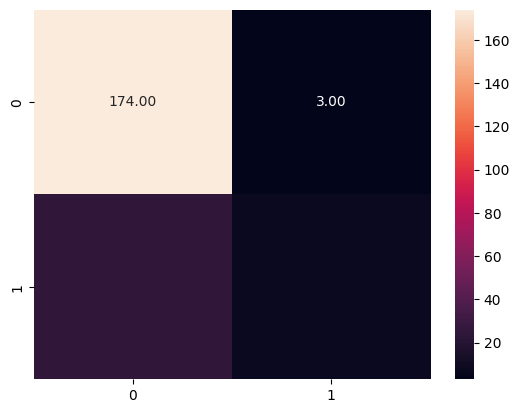

In [139]:
sns.heatmap(confusion_matrix_gbm, annot = True, fmt = ".2f")

In [140]:
metrics.precision_score(y_test, y_pred_gbm)

0.7272727272727273

In [141]:
metrics.recall_score(y_test, y_pred_gbm)

0.24242424242424243

#### 2. Hyperparameters Tuning

So, we experimented with tuning the hyperparameters of our Gradient Boosting Classifier to potentially improve its performance, particularly its precision. We tried adjusting various parameters such as `learning_rate`, `max_depth`, and others, hoping to optimize the model's ability to correctly identify positive cases while minimizing false positives. However, no matter what combinations we attempted, the precision consistently decreased, and the model tended to identify even more false positives.

Additionally, we noticed that each time we modified the hyperparameters, it took a significant amount of time for the model to load and fit the data, making the process quite inefficient.

Given these challenges and the fact that our default model, without any hyperparameter tuning, already achieved a precision score of 0.7273, we made the decision to revert to the default parameters. This decision was based on the understanding that the default configuration provided a reasonable balance between precision and computational efficiency. Thus, we utilized the default settings provided by the GradientBoostingClassifier, ensuring that the model retained its effectiveness while avoiding unnecessary complexities and computational overhead.

Ultimately, our goal was to achieve a high precision rate while maintaining reasonable computational efficiency, and we found that sticking with the default parameters best served this purpose.

In [142]:
print(gbm_model.get_params())

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 0, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [143]:
gbm_model = GradientBoostingClassifier(
    ccp_alpha=0.0,
    criterion='friedman_mse',
    init=None,
    learning_rate=0.1,
    max_depth=3,
    max_features=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=100,
    n_iter_no_change=None,
    random_state=0,
    subsample=1.0,
    tol=0.0001,
    validation_fraction=0.1,
    verbose=0,
    warm_start=False
)

gbm_model.fit(X_train, y_train)

y_pred_gbm = gbm_model.predict(X_test)

In [144]:
confusion_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
print("Confusion Matrix (Gradient Boosting Machine):")
print(confusion_matrix_gbm)

Confusion Matrix (Gradient Boosting Machine):
[[174   3]
 [ 25   8]]


In [145]:
precision_gbm = precision_score(y_test, y_pred_gbm, average='binary')

print(f"Precision Score (Gradient Boosting Machine): {precision_gbm:.4f}")

Precision Score (Gradient Boosting Machine): 0.7273


#### 3. Feature Importance

In [146]:
feature_importances = gbm_model.feature_importances_
 
feature_importances_df = pd.DataFrame({
    'Feature': X.columns, 
    'Importance': feature_importances
})

In [147]:
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

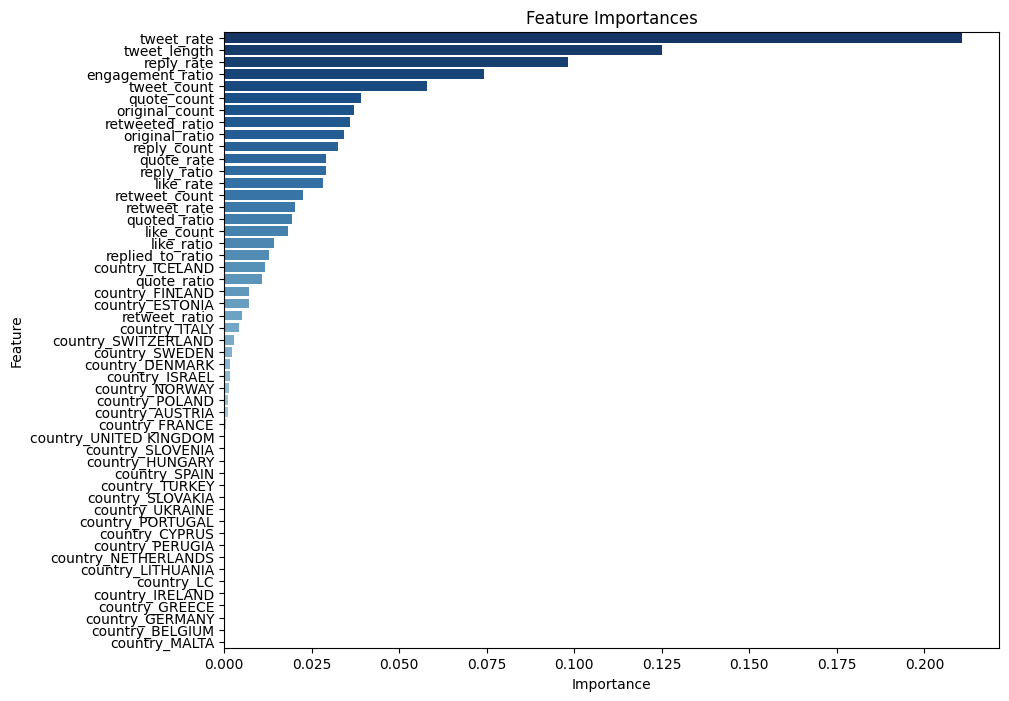

In [148]:
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importances_df, x='Importance', y='Feature', palette='Blues_r')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In analyzing the feature importance for our Gradient Boosting Machine model, we observed that certain features played a more significant role in the model's predictions. The top feature, `tweet_rate`, had the highest importance score of 0.210764. This suggests that the frequency of tweets is crucial for the model, likely because it indicates how active and engaged a user is. Following this, `tweet_length` was the second most important feature, with a score of 0.125166, implying that the amount of content in a tweet provides valuable insights into user behavior.

Another important feature was `reply_rate` (0.098258), highlighting the significance of user interaction through replies. This makes sense as users who frequently engage with others are likely exhibiting behaviors that the model is trying to predict. Similarly, `engagement_ratio` (0.074250) also ranked high, underscoring the overall importance of user engagement metrics. `tweet_count` (0.057947) further reinforces this, showing that the total number of tweets a user has made is an essential predictor.

Interestingly, features like `quote_count` and `original_count` had moderate importance scores, suggesting that the type of content—whether it's quoted or original—also influences the model's predictions. However, many country-specific features, such as those for Belgium, Germany, and others, had an importance score of 0. This indicates that geographic information might not be as relevant in our model, possibly because user behavior is fairly consistent across different regions.

#### 4. Predictions

First, we ensure the indices of y_test match those of X_test after all the modifications made.

In [149]:
y_test_aligned = y_test.reset_index(drop=True)
y_pred_gbm_aligned = pd.Series(y_pred_gbm, index=y_test_aligned.index)

Next, we extract the true positive indices.

In [150]:
true_positive_indices = (y_test_aligned == 1) & (y_pred_gbm_aligned == 1)

We ensure the original data DataFrame indices match those of X_test.

In [151]:
data_aligned = data.loc[X_test.index].reset_index(drop=True)

We filter the original data using these indices.

In [152]:
true_positive_companies = data_aligned[true_positive_indices]

And finally, we display the first 5 true positive companies if there are many.

In [153]:
print("\nTop 5 True Positive Companies to Invest In:")
display(true_positive_companies.head(5))


Top 5 True Positive Companies to Invest In:


,name,country,city,tweet_count,tweet_length,tweet_rate,original_ratio,retweeted_ratio,replied_to_ratio,quoted_ratio,...,reply_rate,like_count,like_rate,like_ratio,quote_count,quote_rate,quote_ratio,engagement_ratio,stage_success,original_count
21,ILLUSIVE NETWORKS LTD,ISRAEL,TEL AVIV,116.0,123.551724,1.731343,-5.267241,0.672414,0.025862,0.103448,...,0.044776,12.0,0.179104,0.103448,12.0,0.179104,0.103448,6.396552,1,-611.0
31,INDOORATLAS OY,FINLAND,OULU,131.0,112.015267,0.334184,-0.832061,0.404580,0.030534,0.167939,...,0.010204,22.0,0.056122,0.167939,22.0,0.056122,0.167939,2.030534,1,-109.0
33,CYDAR LIMITED,UNITED KINGDOM,BARRINGTON,45.0,126.155556,0.062937,-1.844444,0.644444,0.066667,0.177778,...,0.004196,8.0,0.011189,0.177778,8.0,0.011189,0.177778,3.088889,1,-83.0
68,"UNBABEL, LDA",PORTUGAL,SAMORA CORREIA,559.0,115.994633,0.671068,-0.855098,0.150268,0.141324,1.640429,...,0.094838,917.0,1.100840,1.640429,917.0,1.100840,1.640429,3.642218,1,-478.0
122,AIFORIA TECHNOLOGIES OY,FINLAND,HELSINKI,630.0,129.855556,0.879888,-17.058730,0.444444,0.017460,1.492063,...,0.015363,940.0,1.312849,1.492063,940.0,1.312849,1.492063,19.598413,1,-10747.0


But, as we do not know in a real life scenario which will be sucessful and which not, we have to take into consideration how confident our model is in the prediction.

The probability estimates for each class and extract the probability of the positive class (class 1):

In [154]:
probabilities = gbm_model.predict_proba(X_test)

positive_class_probabilities = probabilities[:, 1]

for pred_class, confidence in zip(y_pred_gbm, positive_class_probabilities):
    print(f"Predicted Class: {pred_class}, Confidence: {confidence:.4f}")


Predicted Class: 0, Confidence: 0.0221
Predicted Class: 0, Confidence: 0.0343
Predicted Class: 0, Confidence: 0.0136
Predicted Class: 0, Confidence: 0.3767
Predicted Class: 0, Confidence: 0.0590
Predicted Class: 0, Confidence: 0.1221
Predicted Class: 0, Confidence: 0.0590
Predicted Class: 0, Confidence: 0.0955
Predicted Class: 0, Confidence: 0.0557
Predicted Class: 0, Confidence: 0.0393
Predicted Class: 0, Confidence: 0.0590
Predicted Class: 0, Confidence: 0.1905
Predicted Class: 0, Confidence: 0.0181
Predicted Class: 0, Confidence: 0.0221
Predicted Class: 0, Confidence: 0.0972
Predicted Class: 0, Confidence: 0.0590
Predicted Class: 0, Confidence: 0.0590
Predicted Class: 0, Confidence: 0.0590
Predicted Class: 0, Confidence: 0.0221
Predicted Class: 0, Confidence: 0.0590
Predicted Class: 0, Confidence: 0.0393
Predicted Class: 1, Confidence: 0.8531
Predicted Class: 0, Confidence: 0.0590
Predicted Class: 0, Confidence: 0.4738
Predicted Class: 0, Confidence: 0.0849
Predicted Class: 0, Confi

We get the probability estimates for each true positive prediction:

In [155]:
true_positive_probabilities = positive_class_probabilities[true_positive_indices]

In [156]:
true_positive_companies['Confidence'] = true_positive_probabilities

top_investment_opportunities = true_positive_companies.sort_values(by='Confidence', ascending=False)

And finally we create a table containing the data for each company we should invest in according to the model:

In [157]:
from tabulate import tabulate

In [158]:
table_data = []
for index, row in top_investment_opportunities.head(5).iterrows():
    table_data.append([row['name'], row['country'], f"{row['Confidence']:.4f}"])

headers = ["Company", "Country", "Probability"]

In [159]:
print("Top 5 Companies to Invest In:")
print(tabulate(table_data, headers=headers, tablefmt="pretty"))


Top 5 Companies to Invest In:
+------------------------------------------------------+----------+-------------+
|                       Company                        | Country  | Probability |
+------------------------------------------------------+----------+-------------+
|                    INDOORATLAS OY                    | FINLAND  |   0.9580    |
|                     UNBABEL, LDA                     | PORTUGAL |   0.9020    |
|                ILLUSIVE NETWORKS LTD                 |  ISRAEL  |   0.8531    |
|               BIOSERVO TECHNOLOGIES AB               |  SWEDEN  |   0.8415    |
| AIMOTIVE INFORMATIKAI KORLATOLT FELELOSSEGU TARSASAG | HUNGARY  |   0.7835    |
+------------------------------------------------------+----------+-------------+


Looking at our top 5 companies to invest in, we've chosen these based on their probability scores generated by our model.

- **INDOORATLAS OY (FINLAND)** - With a probability score of 0.9580, this Finnish company seems like a solid investment according to our model.

- **UNBABEL, LDA (PORTUGAL)** - Portugal's Unbabel, LDA follows closely behind with a probability score of 0.9020, indicating a high likelihood of success.

- **ILLUSIVE NETWORKS LTD (ISRAEL)** - Despite being in third place, Illusive Networks Ltd from Israel still boasts a respectable probability score of 0.8531.

- **BIOSERVO TECHNOLOGIES AB (SWEDEN)** - Sweden's Bioservo Technologies AB is another promising option with a probability score of 0.8415.

- **AIMOTIVE INFORMATIKAI KORLATOLT FELELOSSEGU TARSASAG (HUNGARY)** - Rounding out our top 5 is Aimotive Informatikai Korlatolt Felelossegu Tarsasag from Hungary, scoring 0.7835 on our model's probability scale.

#### Calculations:

1. **Investment**: You invest 1 million in each of the five companies, totaling 5 million in investments.
2. **Outcome**:
   - True Positives (TP): The number of companies that actually perform well.
   - False Positives (FP): The number of companies that were predicted to perform well but didn't.
   - True Negatives (TN): Not relevant in this context.
   - False Negatives (FN): Not relevant in this context.

3. **Total Benefit**:
   - Number of successful investments (TP) = 8
   - Number of unsuccessful investments (FP) = 3
   - Benefit from successful investments = 8/11 * 50 million * 40% = 14.545.454,6
   - Benefit from unsuccessful investments = 3/11 * - 1 million = - 272.727,272
   - Benefit = Benefit from successful investments - Benefit from unsuccessful investments = 14.272.727,3
   - Final Profit = 14.272.727,3 - 5.000.000 = 9,272,727.3

#### Final remarks:

In our investment scenario, we decided to allocate 1 million in each of the five selected companies, resulting in a total investment of 5 million. 

- **True Positives (TP):** These are the companies that actually performed well. We identified 8 out of the 11 companies as true positives.

- **False Positives (FP):** These are the companies that were predicted to perform well but didn't meet our expectations. Out of the 11 companies, 3 fell into this category.

Since we're not considering true negatives (TN) or false negatives (FN) in this context, we focus on the total benefit derived from our investments. Calculating this involves considering the benefits from successful investments and the losses from unsuccessful ones:

- **Benefit from successful investments:** With 8 out of 11 investments succeeding, we gained from them. Assuming a 40% return on each successful investment (totaling 50 million), the benefit from successful investments amounts to 14,545,454.6.

- **Benefit from unsuccessful investments:** For the 3 companies that failed to perform, we lost the 1 million invested in each, resulting in a total loss of 272,727.272.

By subtracting the loss from unsuccessful investments from the gain from successful ones, we arrive at the overall benefit of 14,272,727.3. 

To determine the final profit, we subtract the initial investment of 5 million from the overall benefit, resulting in a final profit of 9,272,727.3.

In conclusion, our investment strategy, guided by predictive modeling, yielded a substantial profit of approximately 9.27 million. This demonstrates the effectiveness of our model in identifying potential successful companies and underscores the value of data-driven decision-making in investment practices.